In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from random import randint

# Вывод функции в общем виде
$$
f_0(x) = \dfrac 1 2 (x^TAx) + b^Tx \quad A-положительно~определена 
$$
$$
f_0(x) = \dfrac 1 2 \left((x_1~~x_2~~x_3)
\begin{pmatrix}
{a_{11}} && {a_{12}} && {a_{13}}\\ 
{a_{21}} && {a_{22}} && {a_{23}}\\ 
{a_{31}} && {a_{32}} && {a_{33}}
\end{pmatrix}
\begin{pmatrix}{x_1}\\ {x_2}\\ {x_3}\end{pmatrix}\right)
+ (b_1~~b_2~~b_3)
\begin{pmatrix}{x_1}\\ {x_2}\\ {x_3}\end{pmatrix}
= $$
$$
=\dfrac 1 2 \left(\left(\sum\limits_{i=1}^{3}a_{i1}x_i~~\sum\limits_{i=1}^{3}a_{i2}x_i~~\sum\limits_{i=1}^{3}a_{i3}x_i\right)\begin{pmatrix}{x_1}\\ {x_2}\\ {x_3}\end{pmatrix}\right) +
\sum\limits_{i=1}^{3}b_ix_i=
$$
$$
= \dfrac 1 2 \left( \sum\limits_{j=1}^{3}\left( x_j\sum\limits_{i=1}^{3}a_{ij}x_i\right) \right) + \sum\limits_{i=1}^{3}b_ix_i
$$


In [2]:
A = np.array([[ 1, -2,  1],
              [ 0,  2,  0],
              [ 0, -1,  2]])

b = np.array([1, 2, -1])

In [3]:
for index, val in enumerate(np.linalg.eig(A)[0]):
    print(f'λ{index} = {val}', end=' ; ')

λ0 = 1.0 ; λ1 = 2.0 ; λ2 = 2.0 ; 

$$
A= \begin{pmatrix}
{1} && {-2} && {1} \\ 
{0} && {2} && {0} \\ 
{0} && {-1} && {2}
\end{pmatrix}
$$

$$
b = \begin{pmatrix}{1}\\ {2}\\ {-1}\end{pmatrix}
$$

$$
f_0(x_1, x_2, x_2) = 
\dfrac 1 2 \left(
    x_1(x_1-2x_2+x_3) + 2x_2^2 + x_3(-x_2+2x_3)
\right) +
x_1 + 2x_2 - x_3 =
$$
$$
=
\dfrac 1 2 \left( 
    x_1^2 - 2 x_1x_2 + x_1x_3 + 2x_2^2 - x_2x_3 + 2 x_3^2
\right) + x_1 + 2x_2 - x_3
$$

In [4]:
def f(x1, x2, x3):
    return (x1 ** 2 - 2 * x1 * x2 + x1 * x3 + 2 * x2 ** 2 - x2 * x3 + 2 * x3 ** 2) / 2 + x1 + 2 * x2 - x3

$$
\nabla f(x_1, x_2, x_3) = \begin{pmatrix}
{\dfrac 1 2 (2x_1 - 2x_2 + x_3) + 1} \\ 
{\dfrac 1 2 (-2x_1 + 4x_2 - x_3) + 2} \\
{\dfrac 1 2 (x_1 - x_2 + 4 x_ 3) - 1}
\end{pmatrix}
$$

$$
\begin{cases}
{\dfrac 1 2 (2x_1 - 2x_2 + x_3) + 1 = 0} \\ 
{\dfrac 1 2 (-2x_1 + 4x_2 - x_3) + 2 = 0} \\
{\dfrac 1 2 (x_1 - x_2 + 4 x_ 3) - 1 = 0}
\end{cases} \iff
\begin{cases}
{2x_1 - 2x_2 + x_3 = -2} \\ 
{-2x_1 + 4x_2 - x_3 = -4} \\
{x_1 - x_2 + 4 x_ 3 = 2}
\end{cases} \iff
\begin{cases}
{2x_1 + x_3 = -8} \\ 
{x_2 = -3} \\
{x_1 + 4 x_ 3 = -1}
\end{cases} \iff
$$
$$
\iff
\begin{cases}
{x_1 = -\dfrac {31} 7} \\ 
{x_2 = -3} \\
{x_3 = \dfrac 6 7}
\end{cases}
$$

$$
H(x) = 
\begin{pmatrix}
{1} && {-1} && {\dfrac 1 2} \\ 
{-1} && {2} && {-\dfrac 1 2} \\ 
{\dfrac 1 2} && {-\dfrac 1 2} && {2}
\end{pmatrix}
$$
$
\Delta_1 = 1\quad \Delta_2 =1 \quad \Delta_3 = \dfrac 7 4 \implies
$ положительная определена $\implies \begin{pmatrix}
{- \dfrac {31} 7} \\
{-3} \\
{\dfrac 6 7}
\end{pmatrix}$ - минимум

In [5]:
exact_vec = (-31 / 7, -3, 6 / 7)
exact_vec

(-4.428571428571429, -3, 0.8571428571428571)

In [6]:
def grad_f(x1, x2, x3):
    return (
        (2 * x1 - 2 * x2 + x3) / 2 + 1, 
        (-2 * x1 + 4 * x2 - x3) / 2 + 2,
        (x1 - x2 + 4 * x3) / 2 - 1
    )

In [7]:
def norm_grad_f(dx1, dx2, dx3):
    return np.sqrt(dx1 ** 2 + dx2 ** 2 + dx3 ** 2)

In [8]:
def ГрадиентныйСпуск(v0, h, epsilon):
    x1, x2, x3 = v0
    index = 0

    indexes, steps, x1_vals, x2_vals, x3_vals, func_vals, dx1_vals, dx2_vals, dx3_vals, norms = [], [], [], [], [], [], [], [], [], []

    while True:
        indexes.append(index)
        steps.append(h)
        x1_vals.append(x1)
        x2_vals.append(x2)
        x3_vals.append(x3)

        f_val = f(x1, x2, x3)
        func_vals.append(f_val)

        dx1, dx2, dx3 = grad_f(x1, x2, x3)
        dx1_vals.append(dx1)
        dx2_vals.append(dx2)
        dx3_vals.append(dx3)

        norms.append(norm_grad_f(dx1, dx2, dx3))

        x1, x2, x3 = x1 - h * dx1, x2 - h * dx2, x3 - h * dx3

        if f_val <= f(x1, x2, x3):
            h = h / 2
        
        index += 1

        if norm_grad_f(dx1, dx2, dx3) < epsilon:
            break

    return pd.DataFrame({'h': steps, 'x1': x1_vals, 
                  'x2': x2_vals, 'x3': x3_vals, 
                  'f(x1, x2)': func_vals, 'f\'_x1': dx1_vals, 
                  'f\'_x2': dx2_vals, 'f\'_x3': dx3_vals, 
                  '||∇f||': norms}, index=indexes), index - 1, (x1, x2, x3)

In [9]:
df, index, vec = ГрадиентныйСпуск((1, 1, 1), 1, 0.001)
print(f'Сошлось за {index} итераций')
print(f'Численное решение: {vec}')
print(f'Аналитическое решение: {exact_vec}')
print(f'Норма разницы численного и точного решения = {norm_grad_f(*(np.array(vec) - np.array(exact_vec)))}')
df

Сошлось за 36 итераций
Численное решение: (-4.42695737037959, -2.9990783702623736, 0.8569313047767233)
Аналитическое решение: (-4.428571428571429, -3, 0.8571428571428571)
Норма разницы численного и точного решения = 0.0018706521920272804


,h,x1,x2,x3,"f(x1, x2)",f'_x1,f'_x2,f'_x3,||∇f||
0,1.0,1.000000,1.000000,1.000000,3.500000,1.500000,2.500000,1.000000,3.082207
1,1.0,-0.500000,-1.500000,0.000000,-1.875000,2.000000,-0.500000,-0.500000,2.121320
2,1.0,-2.500000,-1.000000,0.500000,-3.500000,-0.250000,2.250000,-0.750000,2.384848
3,0.5,-2.250000,-3.250000,1.250000,-2.031250,2.625000,-2.875000,2.000000,4.376785
4,0.5,-3.562500,-1.812500,0.250000,-4.419922,-0.625000,1.812500,-1.375000,2.359323
5,0.5,-3.250000,-2.718750,0.937500,-5.158203,0.937500,-0.656250,0.609375,1.296498
6,0.5,-3.718750,-2.390625,0.632812,-5.413086,-0.011719,0.621094,-0.398438,0.738002
7,0.5,-3.712891,-2.701172,0.832031,-5.515928,0.404297,-0.105469,0.158203,0.446775
8,0.5,-3.915039,-2.648438,0.752930,-5.565521,0.109863,0.241699,-0.127441,0.294499
9,0.5,-3.969971,-2.769287,0.816650,-5.593251,0.207642,0.023071,0.032959,0.211503


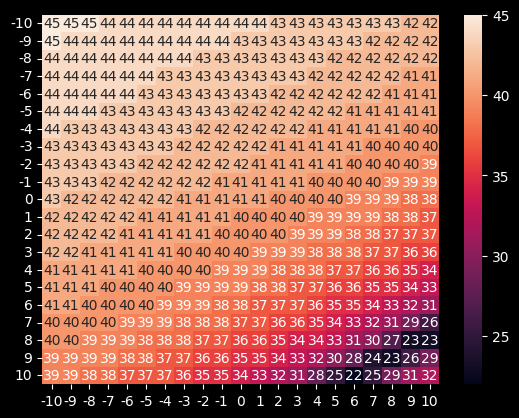

In [10]:
h, epsilon = 1, 0.001
z = 150

data = np.zeros((21, 21), int)

for x in range(-10, 11):
    for y in range(-10, 11):
        data[x + 10, y + 10] = ГрадиентныйСпуск((x, y, z), h, epsilon)[1]

df = pd.DataFrame(data)

sns.heatmap(df, 
            xticklabels=df.columns - 10, 
            yticklabels=df.columns - 10, 
            annot=True)
plt.show()

In [11]:
for z in range(-10, 10):
    h, epsilon = 1, 0.001

    data = np.zeros((21, 21), int)

    for x in range(-10, 11):
        for y in range(-10, 11):
            data[x + 10, y + 10] = ГрадиентныйСпуск((x, y, z), h, epsilon)[1]

    df = pd.DataFrame(data)

    sns.heatmap(df, 
                xticklabels=df.columns - 10, 
                yticklabels=df.columns - 10, 
                annot=True)
    
    plt.savefig(f'images/image_{z + 10}.jpg', dpi=300)

    plt.close()
    plt.clf()

<Figure size 640x480 with 0 Axes>